<a href="https://colab.research.google.com/github/cosmo3769/reinforcement_learning/blob/master/DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Imports

In [1]:
# Check if the notebook is running on colab or not.
try:
    import google.colab
    COLAB = True
except:
    COLAB = False
print(f'Is the notebook using colab environment: {COLAB}')

if COLAB:
    # Install W&B for MLOPs.
    print(f'Installing Weights and Biases')
    !pip install -qq --upgrade wandb
    # Install AutoROM
    print(f'Installing AutoROM')
    !pip install -qq gymnasium[accept-rom-license]
    # Install gymnasium
    print(f'Installing gymnasium[atari]')
    !pip install -qq gymnasium[atari]

Is the notebook using colab environment: True
Installing Weights and Biases
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
Installing AutoROM
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=e505bbf96d8d3db0b8d711d4047e416027dcaa8a054939a8bf411bce0ebb492b
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1

In [ ]:
# Login to your W&B account.
import wandb
wandb.login()

In [2]:
import gymnasium as gym

# Initializing env (ALE/Jamesbond-v5)

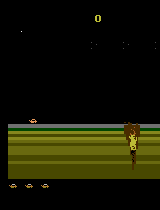

In [9]:
env = gym.make("ALE/Jamesbond-v5", obs_type="rgb", render_mode="rgb_array")

In [10]:
env

<OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/Jamesbond-v5>>>>

# Observation space

In [1]:
print("Observation Space =", env.observation_space)
print("Sample observation =", env.observation_space.sample()) # Get a random observation

NameError: name 'env' is not defined

# Action Space

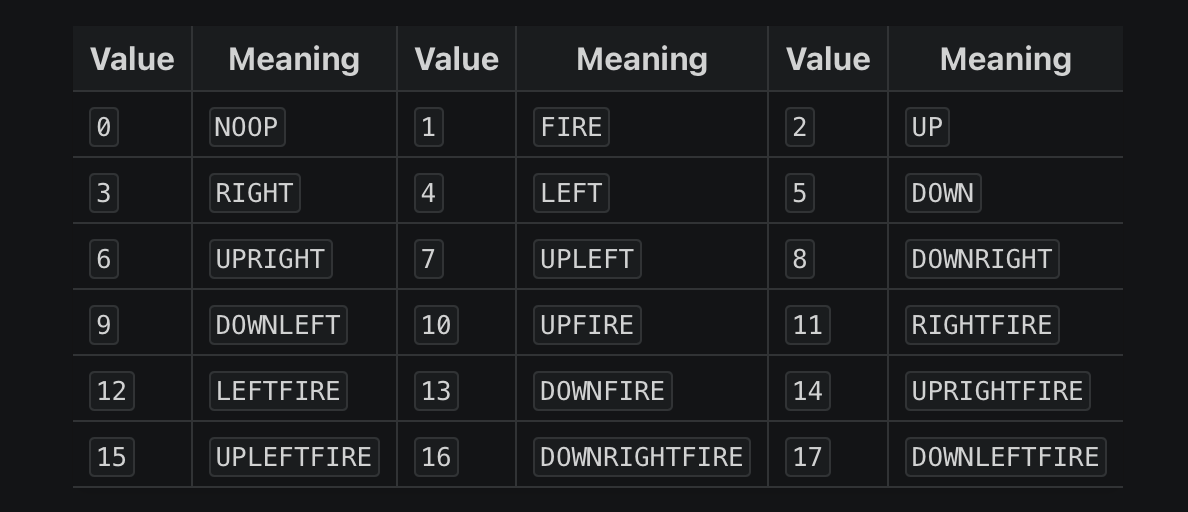

In [18]:
print("Action Space =", env.action_space)
print("Sample action =", env.action_space.sample()) # Take a random action

Action Space = Discrete(18)
Sample action = 14


In [14]:
state, info = env.reset()

In [17]:
print("Initial start state =\n", state)
print("Transition probability =", info)

Initial start state =
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Transition probability = {'lives': 6, 'episode_frame_number': 0, 'frame_number': 0}


In [ ]:
env.unwrapped.get_action_meanings()

gymnasium.wrappers.AtariPreprocessing

def make_env(env_id, seed, idx, capture_video, run_name):
    def thunk():
        if capture_video and idx == 0:
            env = gym.make(env_id, render_mode="rgb_array")
            env = gym.wrappers.RecordVideo(env, f"videos/{run_name}")
        else:
            env = gym.make(env_id)
        env = gym.wrappers.RecordEpisodeStatistics(env)

        env = NoopResetEnv(env, noop_max=30)
        env = MaxAndSkipEnv(env, skip=4)
        env = EpisodicLifeEnv(env)
        if "FIRE" in env.unwrapped.get_action_meanings():
            env = FireResetEnv(env)
        env = ClipRewardEnv(env)
        env = gym.wrappers.ResizeObservation(env, (84, 84))
        env = gym.wrappers.GrayScaleObservation(env)
        env = gym.wrappers.FrameStack(env, 4)

        env.action_space.seed(seed)
        return env

    return thunk

# Baseline

## Preprocessing Pipeline for atari env

## Deep Q Network

# Replay Buffer

# Fixed Q-value targets

# Double DQN

# Prioritized Experience Replay

# Dueling DQN